In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam


In [11]:
#Load the data we exported in the previous step
df = pd.read_csv('Machine_Learning_Data.csv')
df.drop(columns='Unnamed: 0', inplace=True)

#Load the ID & Name list
id_name_list = pd.read_csv('id_name_list.csv')

In [12]:
#Checking the ID for Kevin De Bruyne
#We will use him to check the outputs from our models
id_name_list[id_name_list['1']=='Kevin De Bruyne']

,0,1
491,491,Kevin De Bruyne


Epoch 1/250
1851/1851 [==============================] - 8s 3ms/step - loss: 0.1526 - val_loss: 0.0804
Epoch 2/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0964 - val_loss: 0.0762
Epoch 3/250
1851/1851 [==============================] - 7s 4ms/step - loss: 0.0927 - val_loss: 0.0744
Epoch 4/250
1851/1851 [==============================] - 6s 4ms/step - loss: 0.0904 - val_loss: 0.0729
Epoch 5/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0878 - val_loss: 0.0720
Epoch 6/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0863 - val_loss: 0.0718
Epoch 7/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0863 - val_loss: 0.0716
Epoch 8/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0859 - val_loss: 0.0711
Epoch 9/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0864 - val_loss: 0.0706
Epoch 10/250
1851/1851 [==============================] - 6s 3ms/step - l

Epoch 80/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0795 - val_loss: 0.0642
Epoch 81/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0801 - val_loss: 0.0640
Epoch 82/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0800 - val_loss: 0.0638
Epoch 83/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0805 - val_loss: 0.0639
Epoch 84/250
1851/1851 [==============================] - 7s 4ms/step - loss: 0.0794 - val_loss: 0.0641
Epoch 85/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0803 - val_loss: 0.0641
Epoch 86/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0801 - val_loss: 0.0640
Epoch 87/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0802 - val_loss: 0.0643
Epoch 88/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0799 - val_loss: 0.0639
Epoch 89/250
1851/1851 [==============================] - 6s 3ms

1851/1851 [==============================] - 6s 3ms/step - loss: 0.0792 - val_loss: 0.0637
Epoch 159/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0789 - val_loss: 0.0639
Epoch 160/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0793 - val_loss: 0.0634
Epoch 161/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0792 - val_loss: 0.0638
Epoch 162/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0789 - val_loss: 0.0635
Epoch 163/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0785 - val_loss: 0.0639
Epoch 164/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0796 - val_loss: 0.0634
Epoch 165/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0795 - val_loss: 0.0632
Epoch 166/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0795 - val_loss: 0.0635
Epoch 167/250
1851/1851 [==============================] - 6s 3ms/ste

1851/1851 [==============================] - 6s 3ms/step - loss: 0.0782 - val_loss: 0.0631
Epoch 237/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0785 - val_loss: 0.0631
Epoch 238/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0784 - val_loss: 0.0626
Epoch 239/250
1851/1851 [==============================] - 7s 4ms/step - loss: 0.0787 - val_loss: 0.0632
Epoch 240/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0792 - val_loss: 0.0630
Epoch 241/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0783 - val_loss: 0.0632
Epoch 242/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0783 - val_loss: 0.0628
Epoch 243/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0792 - val_loss: 0.0630
Epoch 244/250
1851/1851 [==============================] - 6s 3ms/step - loss: 0.0787 - val_loss: 0.0630
Epoch 245/250
1851/1851 [==============================] - 6s 3ms/ste

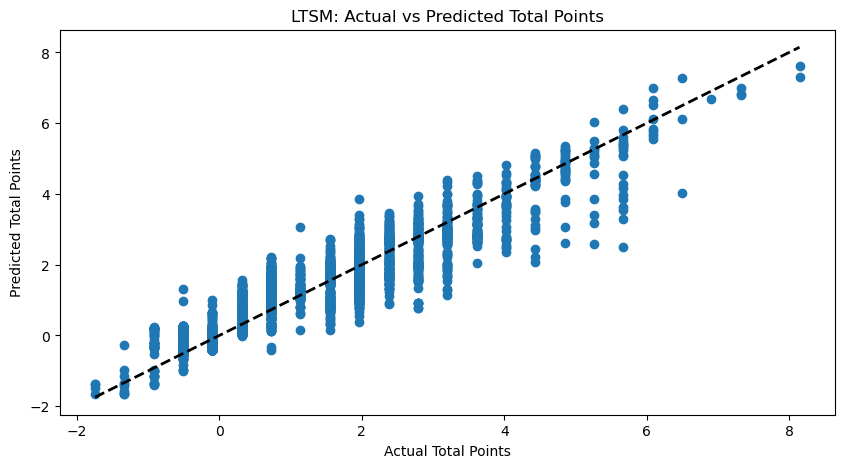

In [13]:
#Split the dataset into train and test sets (80-20 split)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

#Split the data into features and target for both train and test
X_train = train.drop(['total_points', 'ID'], axis=1).values
y_train = train['total_points'].values
X_test = test.drop(['total_points', 'ID'], axis=1).values
y_test = test['total_points'].values

#Reshape the data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#Create the LSTM model
model = Sequential()
model.add(LSTM(units=256, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0004), loss='mean_squared_error')

#Train the model
history = model.fit(X_train, y_train, epochs=250, batch_size=33, validation_data=(X_test, y_test), verbose=1, shuffle=False)

#Predictions
y_pred = model.predict(X_test)

#Performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-Squared: {r2}')

#Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total Points')
plt.ylabel('Predicted Total Points')
plt.title(f'LTSM: Actual vs Predicted Total Points')
plt.show()




In [16]:
#Function to predict 'total_points' given an ID
def predict_total_points(ID):
    features = df[df['ID'] == ID].drop(['total_points', 'ID'], axis=1).values
    features = np.reshape(features, (features.shape[0], 1, features.shape[1]))
    prediction = model.predict(features)
    return prediction

#Test the point prediction
ID = input("Enter an ID: ")
print(f"The predicted total points for ID {ID} is: {sum(predict_total_points(int(ID)))}")

Enter an ID: 491
4/4 [==============================] - 0s 2ms/step
The predicted total points for ID 491 is: [161.30493]


For the Deep Learning (LTSM) model we unfortunately see the same pattern in the errors, and we continue to hover around the same predicted points as for our previous models.